### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
#Setting number of jobs for parallel computing 
n_jobs = 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
%matplotlib inline

In [3]:
data = pd.read_csv('Twitter.data',header = None)

In [4]:
data.columns = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6',
               'AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3',
                'BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1',
               'AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6',
               'AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0',
               'ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Target']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
NCD_0        583250 non-null int64
NCD_1        583250 non-null int64
NCD_2        583250 non-null int64
NCD_3        583250 non-null int64
NCD_4        583250 non-null int64
NCD_5        583250 non-null int64
NCD_6        583250 non-null int64
AI_0         583250 non-null int64
AI_1         583250 non-null int64
AI_2         583250 non-null int64
AI_3         583250 non-null int64
AI_4         583250 non-null int64
AI_5         583250 non-null int64
AI_6         583250 non-null int64
AS(NA)_0     583250 non-null float64
AS(NA)_1     583250 non-null float64
AS(NA)_2     583250 non-null float64
AS(NA)_3     583250 non-null float64
AS(NA)_4     583250 non-null float64
AS(NA)_5     583250 non-null float64
AS(NA)_6     583250 non-null float64
BL_0         583250 non-null float64
BL_1         583250 non-null float64
BL_2         583250 non-null float64
BL_3         583250 non-null 

In [6]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [7]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [8]:
from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

In [9]:
#Sample Dataset for SVM.We are taking small sampled dataset as it is taking more time for computation.
from sklearn.model_selection import train_test_split
_, sample_data_svm, _, sample_target_svm = train_test_split(X, y, shuffle = True, test_size = 0.05)

In [10]:
sample_data.shape

(58325, 77)

In [11]:
sample_target.shape

(58325,)

In [12]:
X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data,sample_target)

In [13]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(sample_data_svm,sample_target_svm)

# Explore data

# Checking for Null Values

In [14]:
data.isnull().any().sum()

0

# Heatmap for correlation

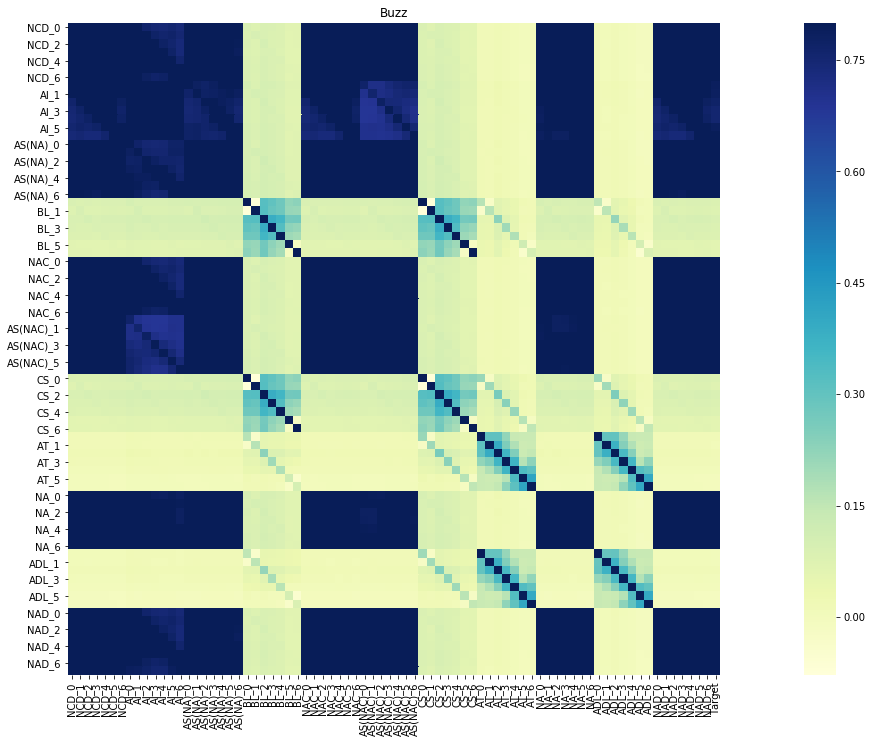

In [15]:
f, (ax1) = plt.subplots(1,1,figsize =(30, 12))

sns.heatmap(data.corr(), vmax = .8, square=True, ax = ax1, cmap = 'YlGnBu')
ax1.set_title('Buzz')


plt.show()

# Data Distribution

/home/meetprateekrawat/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


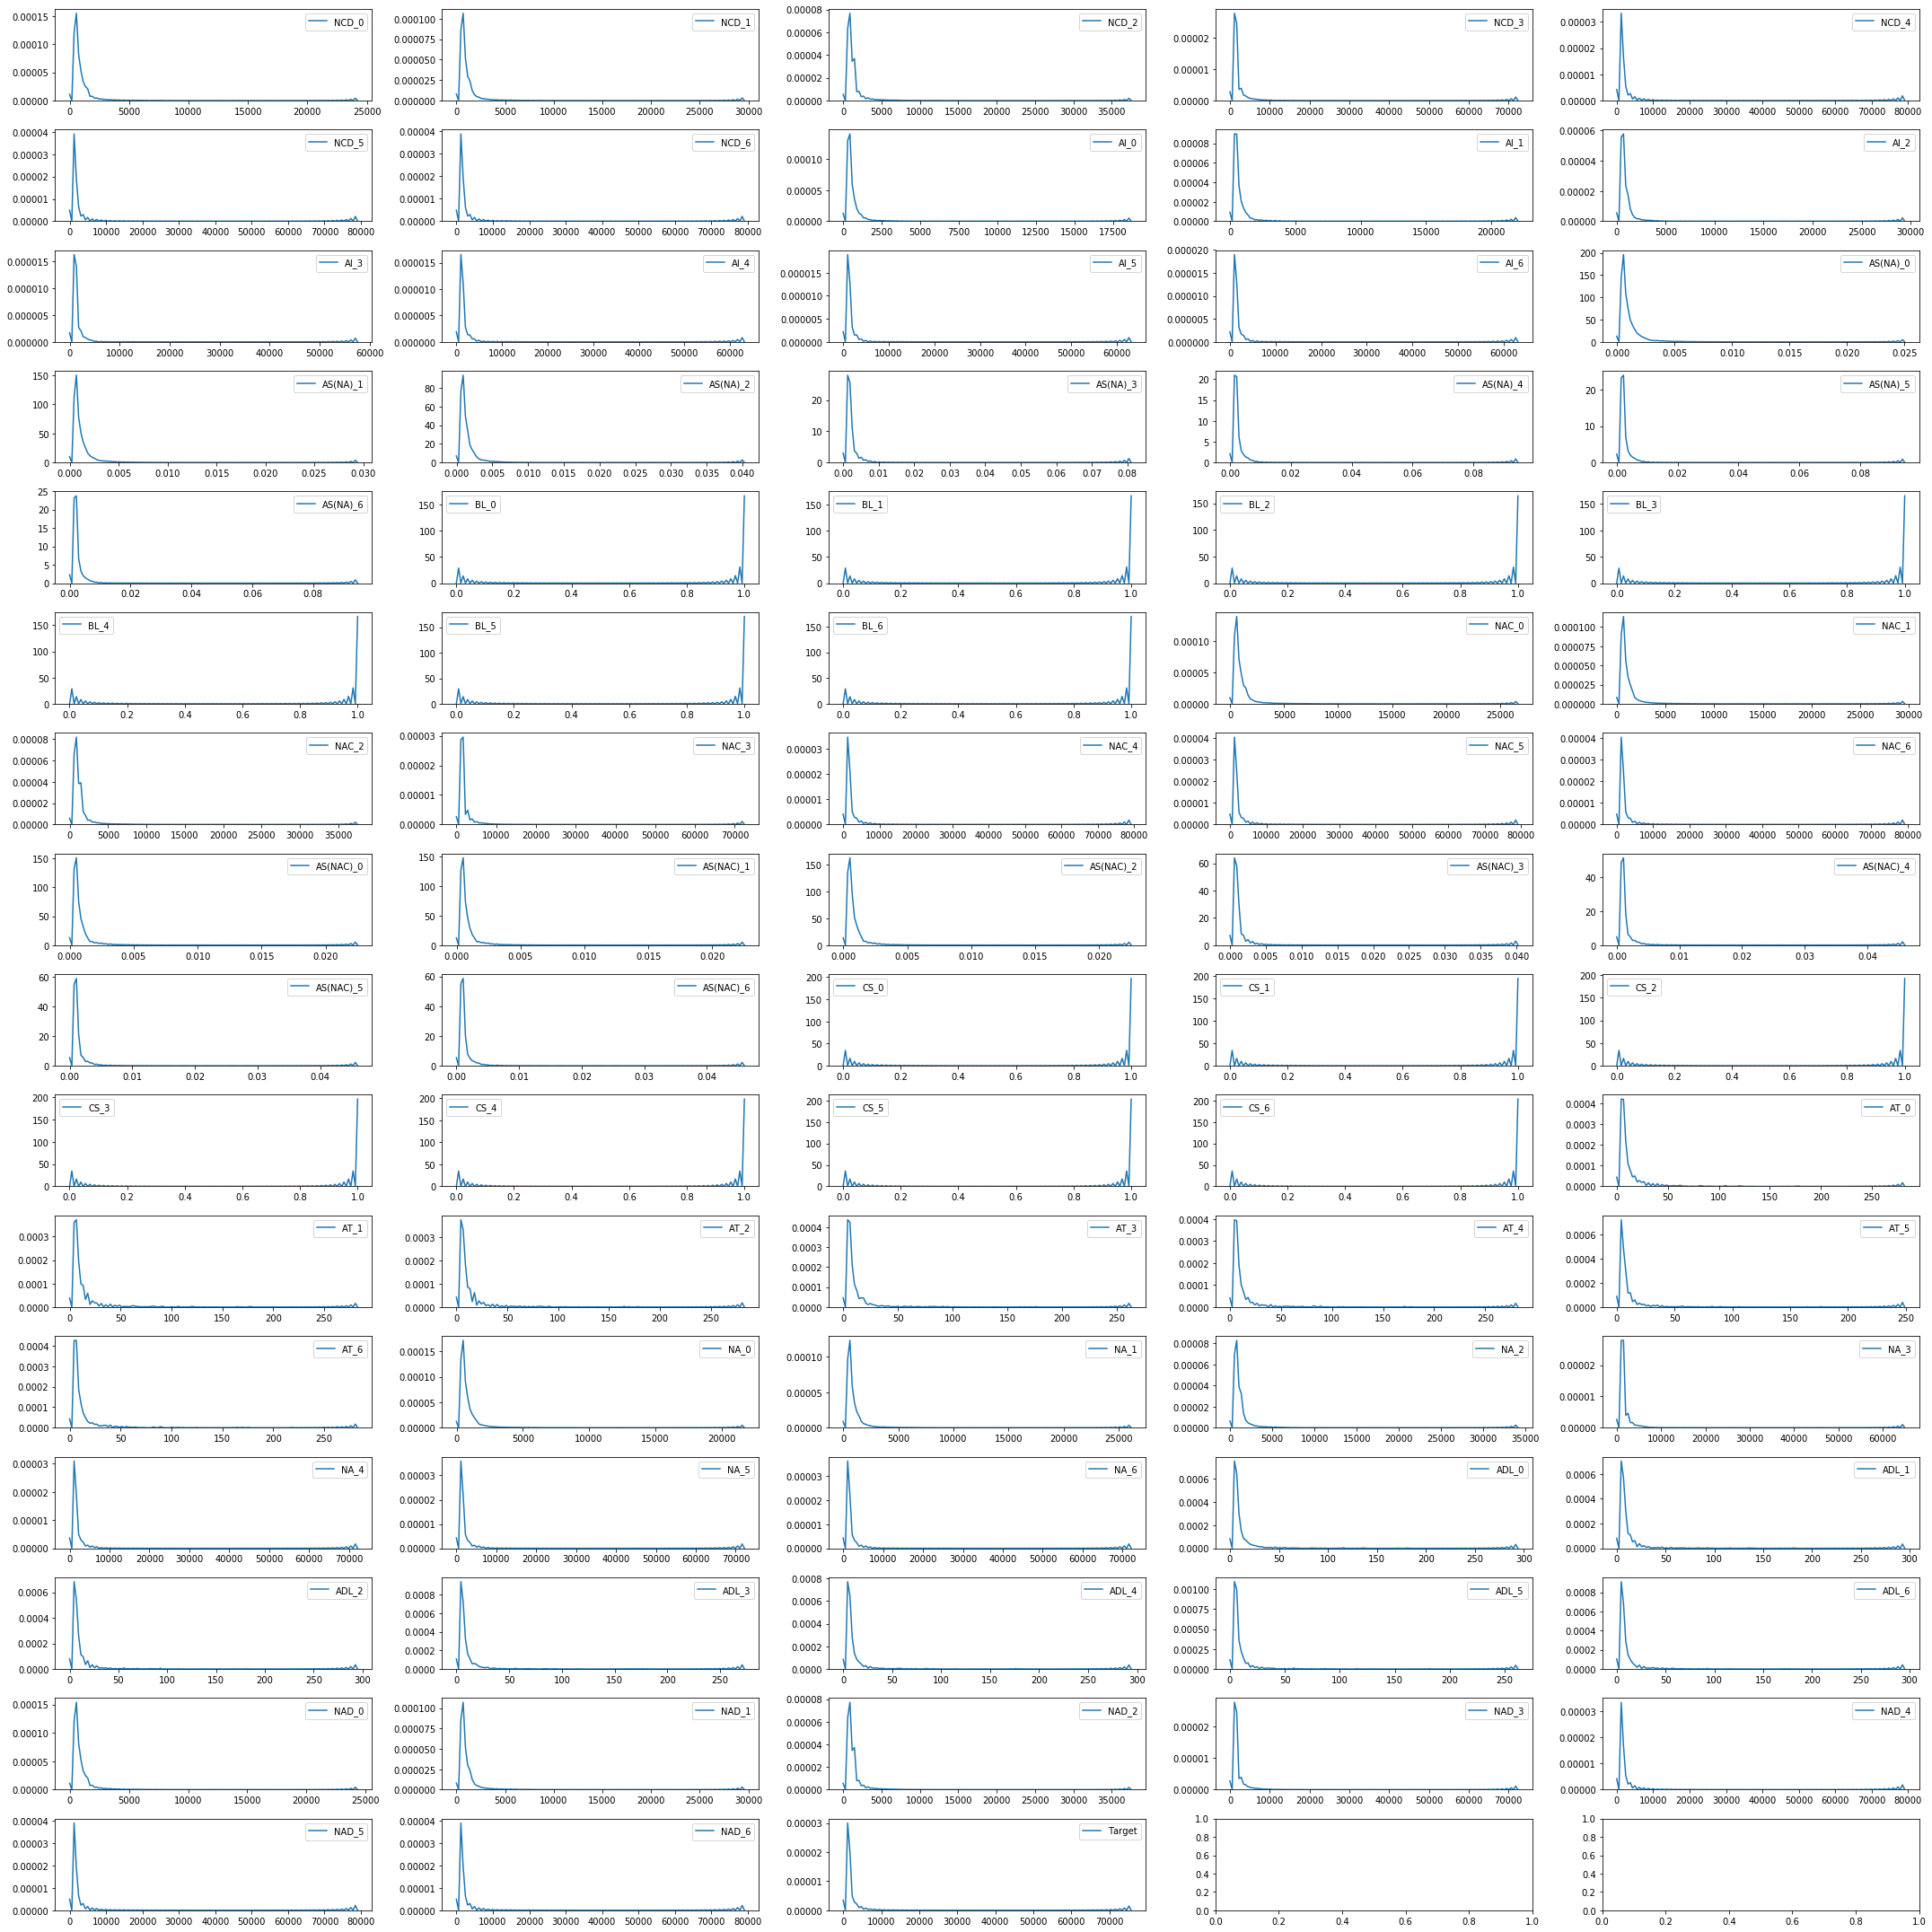

In [16]:

colnames = pd.Series(data.columns)
fig, axs = plt.subplots(16,5, figsize=(30, 30), facecolor='w', edgecolor='k')

axs = axs.ravel()

for i in colnames.index.values:
    
    sns.kdeplot(data[colnames[i]], ax=axs[i])
    fig.tight_layout()
plt.show()

# Data is not normally distributed within each feature, so standard scaler is not the best scaler to use. We have to use min max scaler which is suited for such non gaussian distributions 

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [18]:
#sample for radial and polynomial svm
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_svm = scaler.fit_transform(X_train_svm)
X_test_svm = scaler.transform(X_test_svm)

In [64]:
report_table = []

# Linear regression with normal equation

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
lreg = LinearRegression()

In [21]:
scores = cross_val_score(lreg, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Train Score {:.2f}".format(scores.mean()))
lreg.fit(X_train, y_train)
test_score = lreg.score(X_test,y_test) 
print("Test Score {:.2f}".format(test_score))

Cross-validation scores: [0.93240706 0.9446381  0.92742164 0.5091874  0.92931223]
Train Score 0.85
Test Score 0.94


In [65]:
report_table.append({'Model_name':'LinearRegression',
                    'Paramater':'No Parameter',
                    'Training_score': scores.mean(),
                    'Test Score':test_score})

# SGD Regressor

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
param_SGD = {'max_iter': [10, 100, 1000],'learning_rate':['optimal'], 'penalty' :['l1','l2'],'random_state':[0]}
print("Parameter grid:\n{}".format(param_SGD))
grid_SGD = GridSearchCV(estimator = SGDRegressor(), param_grid = param_SGD, cv=5, return_train_score=True, n_jobs=n_jobs)

Parameter grid:
{'max_iter': [10, 100, 1000], 'learning_rate': ['optimal'], 'penalty': ['l1', 'l2'], 'random_state': [0]}


In [24]:
grid_SGD.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=48,
       param_grid={'max_iter': [10, 100, 1000], 'learning_rate': ['optimal'], 'penalty': ['l1', 'l2'], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [25]:
print("CV result: {}".format(grid_SGD.cv_results_['mean_test_score']))
#print("Best cross-validation score: {:.2f}".format(grid_SGD.best_score_))
print("Best parameters: {}".format(grid_SGD.best_params_))
print("Training Score: {}".format(grid_SGD.score(X_train, y_train)))
print("Testing Score: {}".format(grid_SGD.score(X_test, y_test)))

CV result: [-1.12436848e+15 -9.87530723e+11 -2.48503737e+14 -1.83953090e+09
 -1.23957865e+14 -6.14257018e+06]
Best parameters: {'learning_rate': 'optimal', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 0}
Training Score: -3162361.18069992
Testing Score: -5242577.070515869


In [66]:
report_table.append({'Model_name':'SGDReg',
                    'Paramater':grid_SGD.best_params_,
                    'Training_score': grid_SGD.score(X_train, y_train),
                    'Test Score':grid_SGD.score(X_test, y_test)})

# Polynomial

In [27]:
from sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []
lreg_poly = LinearRegression()

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    scores_train = cross_val_score(lreg_poly, X_train_poly, y_train, cv=5)
    train_score_list.append(scores_train.mean())
    lreg_poly.fit(X_train_poly,y_train)
    scores_test = lreg_poly.score(X_test_poly,y_test)
    test_score_list.append(scores_test)

print(train_score_list)
print(test_score_list)

[0.8485932860137112, -2.213042630878888]
[0.9429515868880877, -0.3844659877179639]


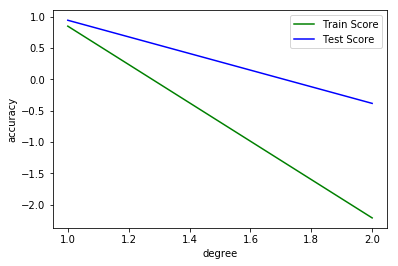

In [28]:
%matplotlib inline
x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [67]:
report_table.append({'Model_name':'PolyReg',
                    'Paramater':{'degree':1},
                    'Training_score':train_score_list[0],
                    'Test Score':test_score_list[0]
                    })

# Ridge

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
model = Ridge(random_state=0)
param_Ridge = {'alpha': np.logspace(-3, 3, 13)}
print("Parameter grid:\n{}".format(param_Ridge))
grid_Ridge = GridSearchCV(estimator = model,param_grid = param_Ridge, cv=5, return_train_score=True,scoring='r2', n_jobs = n_jobs)

Parameter grid:
{'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])}


In [31]:
grid_Ridge.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=48,
       param_grid={'alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

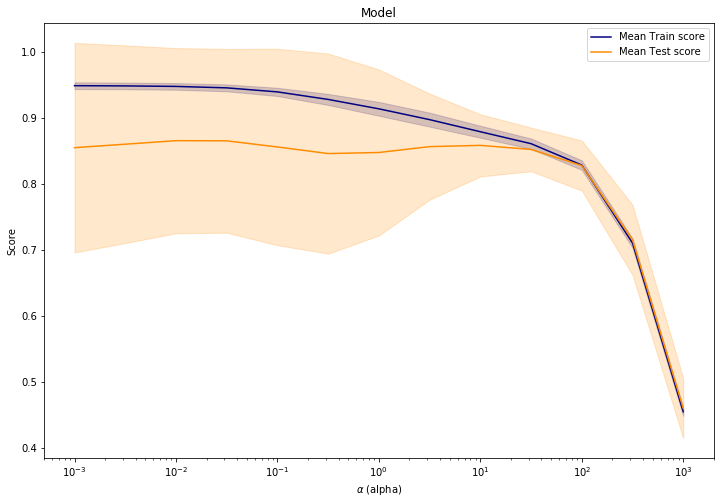

In [32]:
alphas = np.logspace(-3, 3, 13)

train_scores_mean = grid_Ridge.cv_results_["mean_train_score"]
train_scores_std = grid_Ridge.cv_results_["std_train_score"]
test_scores_mean = grid_Ridge.cv_results_["mean_test_score"]
test_scores_std = grid_Ridge.cv_results_["std_test_score"]

plt.figure(figsize = (12,8))
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

In [33]:
print("Best cross-validation score: {:.2f}".format(grid_Ridge.best_score_))
print("Best parameters: {}".format(grid_Ridge.best_params_))
print("Training Score: {}".format(grid_Ridge.score(X_train, y_train)))
print("Testing Score: {}".format(grid_Ridge.score(X_test, y_test)))

Best cross-validation score: 0.87
Best parameters: {'alpha': 0.01}
Training Score: 0.9452491378442471
Testing Score: 0.9434631792808654


In [68]:
report_table.append({'Model_name':'Ridge',
                    'Paramater':grid_Ridge.best_params_,
                    'Training_score':grid_Ridge.score(X_train, y_train),
                    'Test Score':grid_Ridge.score(X_test, y_test)
                    })

# Lasso

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
from  sklearn.linear_model import Lasso
model_Lasso = Lasso(random_state=0)
param_Lasso = {'alpha': np.logspace(-3, 3, 13)}
print("Parameter grid:\n{}".format(param_Lasso))
grid_Lasso = GridSearchCV(model_Lasso, param_grid = param_Lasso, cv=5, return_train_score=True, n_jobs=n_jobs)

Parameter grid:
{'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])}


In [37]:
grid_Lasso.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=48,
       param_grid={'alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

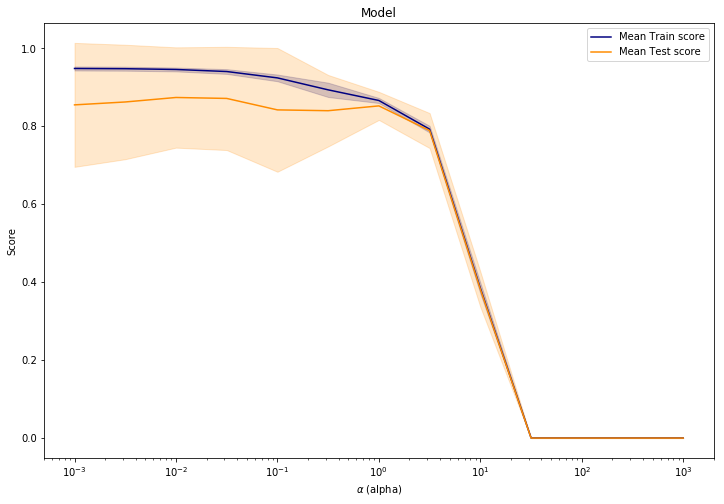

In [38]:
alphas = np.logspace(-3, 3, 13)

train_scores_mean = grid_Lasso.cv_results_["mean_train_score"]
train_scores_std = grid_Lasso.cv_results_["std_train_score"]
test_scores_mean = grid_Lasso.cv_results_["mean_test_score"]
test_scores_std = grid_Lasso.cv_results_["std_test_score"]

plt.figure(figsize = (12,8))
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

In [39]:
print("Best cross-validation score: {:.2f}".format(grid_Lasso.best_score_))
print("Best parameters: {}".format(grid_Lasso.best_params_))
print("Training Score: {}".format(grid_Lasso.score(X_train, y_train)))
print("Testing Score: {}".format(grid_Lasso.score(X_test, y_test)))

Best cross-validation score: 0.87
Best parameters: {'alpha': 0.01}
Training Score: 0.9433472784938557
Testing Score: 0.9398821820526597


In [69]:
report_table.append({'Model_name':'Lasso',
                    'Paramater':grid_Lasso.best_params_,
                    'Training_score':grid_Lasso.score(X_train, y_train),
                    'Test Score':grid_Lasso.score(X_test, y_test)
                    })

# KNN Regressor

In [3]:
from sklearn.neighbors import KNeighborsRegressor
model_KNN = KNeighborsRegressor(n_jobs = n_jobs)
param_KNN = {'n_neighbors':[1, 5, 10, 15, 20]}
print("Parameter grid:\n{}".format(param_KNN))
grid_KNN = GridSearchCV(model_KNN, param_grid = param_KNN, cv=5, return_train_score=True, n_jobs = n_jobs)

In [42]:
grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=48, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=48,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

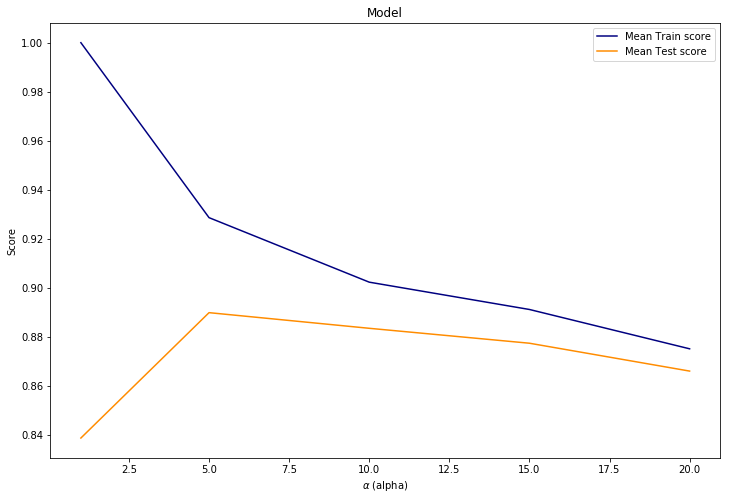

In [43]:
nearest_neighbours = [1, 5, 10, 15, 20]

train_scores_mean = grid_KNN.cv_results_["mean_train_score"]
train_scores_std = grid_KNN.cv_results_["std_train_score"]
test_scores_mean = grid_KNN.cv_results_["mean_test_score"]
test_scores_std = grid_KNN.cv_results_["std_test_score"]

plt.figure(figsize = (12,8))
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.plot(nearest_neighbours, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
#plt.gca().fill_between(nearest_neighbours,
                       #train_scores_mean - train_scores_std,
                       #train_scores_mean + train_scores_std,
                       #alpha=0.2,
                       #color='navy')
plt.plot(nearest_neighbours, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
#plt.gca().fill_between(nearest_neighbours,
                       #test_scores_mean - test_scores_std,
                       #test_scores_mean + test_scores_std,
                       #alpha=0.2,
                       #color='darkorange')
plt.legend(loc='best')
plt.show()

In [44]:
print("Best cross-validation score: {:.2f}".format(grid_KNN.best_score_))
print("Best parameters: {}".format(grid_KNN.best_params_))
print("Training Score: {}".format(grid_KNN.score(X_train, y_train)))
print("Testing Score: {}".format(grid_KNN.score(X_test, y_test)))

Best cross-validation score: 0.89
Best parameters: {'n_neighbors': 5}
Training Score: 0.9313656875285667
Testing Score: 0.9087102116686004


In [70]:
report_table.append({'Model_name':'KNN',
                    'Paramater':grid_KNN.best_params_,
                    'Training_score':grid_KNN.score(X_train, y_train),
                    'Test Score':grid_KNN.score(X_test, y_test)
                    })

# LINEAR SVR

In [46]:
from sklearn.svm import LinearSVR
model_Linear_SVM = LinearSVR(random_state=0)
param_Linear_SVM = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print("Parameter grid:\n{}".format(param_Linear_SVM))
grid_Linear_SVM = GridSearchCV(model_Linear_SVM, param_grid = param_Linear_SVM, cv=5, return_train_score=True, n_jobs = n_jobs)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [47]:
grid_Linear_SVM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=0, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=48,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

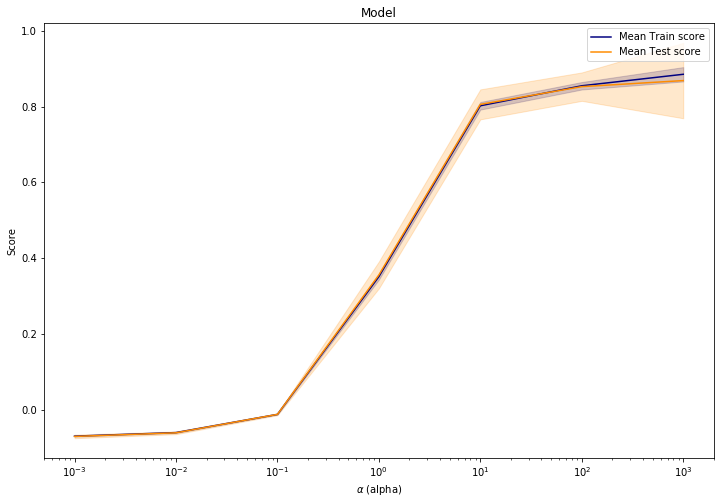

In [48]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

train_scores_mean = grid_Linear_SVM.cv_results_["mean_train_score"]
train_scores_std = grid_Linear_SVM.cv_results_["std_train_score"]
test_scores_mean = grid_Linear_SVM.cv_results_["mean_test_score"]
test_scores_std = grid_Linear_SVM.cv_results_["std_test_score"]

plt.figure(figsize = (12,8))
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx(C, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(C,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(C, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(C,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

In [49]:
print("Best cross-validation score: {:.2f}".format(grid_Linear_SVM.best_score_))
print("Best parameters: {}".format(grid_Linear_SVM.best_params_))
print("Training Score: {}".format(grid_Linear_SVM.score(X_train, y_train)))
print("Testing Score: {}".format(grid_Linear_SVM.score(X_test, y_test)))

Best cross-validation score: 0.87
Best parameters: {'C': 1000}
Training Score: 0.88549218543592
Testing Score: 0.9399102479066528


In [71]:
report_table.append({'Model_name':'LinearSVR',
                    'Paramater':grid_Linear_SVM.best_params_,
                    'Training_score':grid_Linear_SVM.score(X_train, y_train),
                    'Test Score':grid_Linear_SVM.score(X_test, y_test)
                    })

### SVM WITH RADIAL KERNEL

In [51]:
from sklearn.svm import SVR
model_Radial_SVM = SVR(kernel = 'rbf')
param_Radial_SVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_Radial_SVM))
grid_Radial_SVM = GridSearchCV(model_Radial_SVM, param_grid = param_Radial_SVM, cv=5, return_train_score=True, n_jobs = n_jobs)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [52]:
grid_Radial_SVM.fit(X_train_svm, y_train_svm)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=48,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

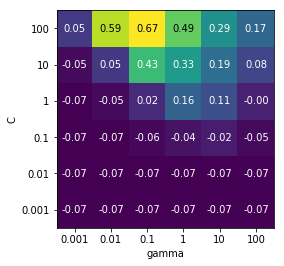

In [53]:
results_Radial_SVM = pd.DataFrame(grid_Radial_SVM.cv_results_)
%matplotlib notebook
%matplotlib inline
scores = np.array(results_Radial_SVM.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_Radial_SVM['gamma'], ylabel='C', yticklabels=param_Radial_SVM['C'], cmap="viridis")
plt.figure
plt.show()

In [54]:
print("Best cross-validation score: {:.2f}".format(grid_Radial_SVM.best_score_))
print("Best parameters: {}".format(grid_Radial_SVM.best_params_))
print("Training Score: {}".format(grid_Radial_SVM.score(X_train_svm, y_train_svm)))
print("Testing Score: {}".format(grid_Radial_SVM.score(X_test_svm, y_test_svm)))

Best cross-validation score: 0.67
Best parameters: {'C': 100, 'gamma': 0.1}
Training Score: 0.666376379172376
Testing Score: 0.5046889522456434


In [72]:
report_table.append({'Model_name':'RadialKernel',
                    'Paramater':grid_Radial_SVM.best_params_,
                    'Training_score':grid_Radial_SVM.score(X_train_svm, y_train_svm),
                    'Test Score':grid_Radial_SVM.score(X_test_svm, y_test_svm)
                    })

# Polynomial Kernel SVM

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
model_Poly_SVM = SVR(kernel = 'poly', degree = 2)
param_Poly_SVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_Poly_SVM))
grid_Poly_SVM = GridSearchCV(model_Poly_SVM, param_grid = param_Poly_SVM, cv=5, return_train_score= True, n_jobs = n_jobs)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [57]:
grid_Poly_SVM.fit(X_train_svm, y_train_svm)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=48,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

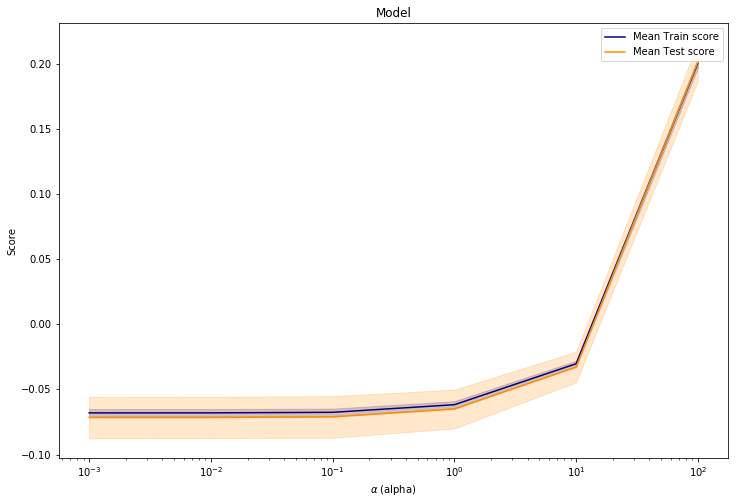

In [58]:
C = [0.001, 0.01, 0.1, 1, 10, 100]

train_scores_mean = grid_Poly_SVM.cv_results_["mean_train_score"]
train_scores_std = grid_Poly_SVM.cv_results_["std_train_score"]
test_scores_mean = grid_Poly_SVM.cv_results_["mean_test_score"]
test_scores_std = grid_Poly_SVM.cv_results_["std_test_score"]

plt.figure(figsize = (12,8))
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx(C, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(C,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(C, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(C,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

In [59]:
print("Best cross-validation score: {:.2f}".format(grid_Poly_SVM.best_score_))
print("Best parameters: {}".format(grid_Poly_SVM.best_params_))
print("Training Score: {}".format(grid_Poly_SVM.score(X_train_svm, y_train_svm)))
print("Testing Score: {}".format(grid_Poly_SVM.score(X_test_svm, y_test_svm)))

Best cross-validation score: 0.20
Best parameters: {'C': 100}
Training Score: 0.2560834061700198
Testing Score: 0.32120514613461515


In [73]:
report_table.append({'Model_name':'PolyKernel',
                    'Paramater':grid_Poly_SVM.best_params_,
                    'Training_score':grid_Poly_SVM.score(X_train_svm, y_train_svm),
                    'Test Score':grid_Poly_SVM.score(X_test_svm, y_test_svm)
                    })

In [74]:
report = pd.DataFrame(report_table)
report.set_index('Model_name', inplace = True)

In [75]:
report

,Paramater,Test Score,Training_score
Model_name,,,
LinearRegression,No Parameter,9.429516e-01,6.338193e-02
SGDReg,"{'learning_rate': 'optimal', 'max_iter': 1000,...",-5.242577e+06,-3.162361e+06
PolyReg,{'degree': 1},9.429516e-01,8.485933e-01
Ridge,{'alpha': 0.01},9.434632e-01,9.452491e-01
Lasso,{'alpha': 0.01},9.398822e-01,9.433473e-01
KNN,{'n_neighbors': 5},9.087102e-01,9.313657e-01
LinearSVR,{'C': 1000},9.399102e-01,8.854922e-01
RadialKernel,"{'C': 100, 'gamma': 0.1}",5.046890e-01,6.663764e-01
PolyKernel,{'C': 100},3.212051e-01,2.560834e-01


# Based on the model scores on test and training data, Ridge Regression is the best model as it has the highest Test score as well as highest Training Score  

#    

# Applying Ridge Regression on entire dataset

In [93]:
from sklearn.model_selection import train_test_split
X_train_T, X_test_T, y_train_T, y_test_T = train_test_split(X, y, shuffle = True, test_size = 0.2, random_state = 0)

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_TS = scaler.fit_transform(X_train_T)
X_test_TS = scaler.transform(X_test_T)

# Fit model on Entire Training set

In [95]:
model_ridge = Ridge(alpha=0.01,random_state=0)
model_ridge.fit(X_train_TS,y_train_T)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)

In [96]:
model_ridge.intercept_

-0.5378774738582308

In [86]:
model_ridge.coef_

array([ 4.77528922e+03,  9.33328351e+03,  8.63974394e+03,  4.19366705e+03,
       -7.64070415e+02,  8.68313844e+00,  3.02391944e+04,  2.34338898e+02,
       -3.17529015e+03,  5.03916027e+03,  3.79330401e+03, -7.05322405e+03,
       -1.18170426e+04,  1.89622140e+04,  1.03821698e+04,  4.26340820e+03,
        4.15654976e+02, -3.93642200e+03, -1.82884547e+03,  5.69051236e+03,
       -2.36200270e+04, -1.50747980e+00,  4.90461974e+00,  2.31320931e+00,
        5.65090645e+00,  5.60057517e+00,  6.46663309e+00, -2.41675815e+00,
        7.84486702e+03, -7.89766440e+03, -5.97013840e+03, -2.99457491e+03,
       -3.12052663e+02,  8.11760897e+03,  1.43354418e+04, -7.42229332e+03,
       -1.45958214e+03,  2.20213007e+03,  5.16286195e+03,  3.65515185e+03,
       -4.30908992e+03, -5.63620997e+03,  3.22313946e-01, -1.17706363e+01,
       -2.63171083e+00, -3.84957810e+00, -7.06930805e-01, -2.14827151e+00,
        2.90886114e+00, -7.07490035e+01, -4.64905094e+02, -7.10472480e+01,
        1.30445262e+02,  

# Predict the Buzz

In [97]:
y_predict_Buzz = model_ridge.predict(X_test_TS)

# Accuracy on Test set

In [98]:
from sklearn.metrics import r2_score
r2_score(y_test_T,y_predict_Buzz)

0.9476987727351589